In [1]:
#%matplotlib inline

#import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('Q:\\python\\lib')
import Sun
import AIA
from hydropy import hydro
from pyfield import *

In [2]:
nx = 100
L = 1.2e10
H = 1e9
dt = 1e-1

idx = (1-np.cos(np.arange(0,nx).astype(np.double)/(nx-1.)*np.pi))*0.5
#idx = np.arange(0,nx).astype(np.double)/(nx-1.)
X = np.zeros((nx,3), dtype = np.double)

#X[:,0] = idx*L
X[:,0] = np.cos(idx*np.pi, dtype = np.double)*L/2
X[:,2] = np.sin(idx*np.pi, dtype = np.double)*H

#X[:,0] = idx**2*L
#X[:,2] = 2*idx*(1-idx)*H*2


rho = np.zeros(nx, dtype = np.double)
rhou = np.zeros(nx, dtype = np.double)
rhoe = np.zeros(nx, dtype = np.double)
hrate = np.zeros(nx, dtype = np.double)

m = Sun.mu_c*Sun.m_p
rho = np.ones(nx, dtype = np.double)*1e9*m
#rho = (-np.sin(idx*np.pi)*9e9+1e10)*m


T = np.ones(nx, dtype = np.double)*2e4
#T = np.sin(idx*np.pi)*2e4+2e6
rhoe = 3*rho/m*Sun.k_b*T

def hrate(time):
    #if time < 250*12:
    #    return 2e-3*np.sin(idx*np.pi)*np.sin(np.pi*time/(250*12))
    #else:
    #    return 0.
    
    if time < 250*12:
        return 1e-3
    else:
        return 0.

    #return 5e-4*np.exp(-time/(100*12.))



PDE = hydro(dt,X,rho,rhou,rhoe,hrate, maxiter = 120*800, each = 120)
PDE.start()


[0, 800, 0, 100]

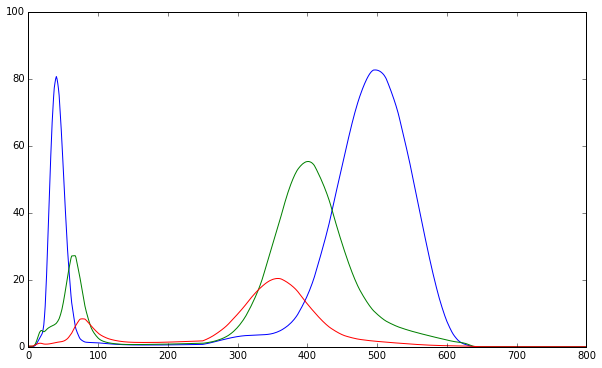

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.plot(PDE.I171)
plt.plot(PDE.I193)
plt.plot(PDE.I211)
plt.axis([0,800,0,100])

In [103]:
2.5*PDE.p[0]*PDE.ui[1], Sun.kappa*(PDE.T[0]**2.5)*(PDE.T[1] - PDE.T[0])/PDE.dx[1]

(-40952.150488603322, 39505.026682807846)

In [92]:
np.sum(PDE.rho[1:-1]*PDE.ds[1:-1])

1.2647876681368196e-05

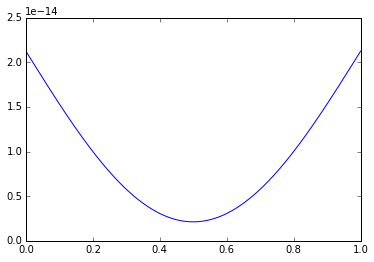

In [5]:
plt.plot(idx,rho)

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

nx = 100
idx = np.arange(0,nx).astype(np.double)/(nx-1)

a = np.sin(idx*np.pi)
b = np.ones(nx)

def step(x,y):
    q = 0.1
    
    x -= (np.roll(y,-1)-np.roll(y,1))*q
    y -= (np.roll(x,-1)-np.roll(x,1))*q
    
    #x[0] = x[1]
    #x[-1] = x[-2]
    
    #y[0] = y[1]
    #y[-1] = y[-2]
    
    #x[0] = x[-2]
    #x[-1] = x[1]
    
    #y[0] = y[-2]
    #y[-1] = y[1]

for i in range(0,100):    
    step(a,b)    
    

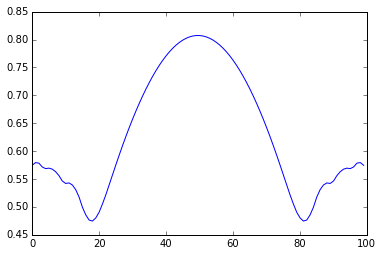

In [9]:
plt.plot(a)

In [1]:
import numpy as np

In [3]:
np.max([[1,1,1],[2,2,2],[3,3,3]], axis = 0)

array([3, 3, 3])